In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Dropout, Activation
from keras import models
import numpy as np
import tensorflow
from numpy.random import seed
import os
import random

from keras.preprocessing.image import ImageDataGenerator

In [2]:
seed = 2
def reset_random_seeds():
    os.environ['PYTHONHASHSEED'] = str(seed)
    tensorflow.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [3]:
img_rows = 256
img_cols = 256
epochs = 20
batch_size = 64

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1. / 255,validation_split=0.3)

In [5]:
training_set = train_datagen.flow_from_directory('Artists_dataset', 
                                                 subset="training",
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('Artists_dataset', 
                                            subset="validation",
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size,shuffle=False,
                                            class_mode='categorical')


Found 5606 images belonging to 11 classes.
Found 2397 images belonging to 11 classes.


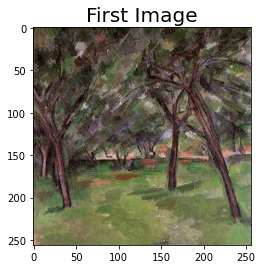

In [6]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
plt.figure()
plt.title("First Image",fontsize=20)
img1 = load_img('Artists_dataset/Cezanne/215457.jpg')
new_width  = 256
new_height = 256
img1 = img1.resize((new_width, new_height))
img1 = img_to_array(img1)
plt.imshow(img1.astype(int))

In [7]:
num_of_train_samples = 5606
num_of_test_samples = 2397

In [8]:
test_set.class_indices

{'Cezanne': 0,
 'Degas': 1,
 'Manet': 2,
 'Matisse': 3,
 'Monet': 4,
 'Morisot': 5,
 'Pissaro': 6,
 'Renoir': 7,
 'Sargent': 8,
 'Sisley': 9,
 'Sorolla': 10}

In [9]:
x=5
def build_model():
    reset_random_seeds()
    model = models.Sequential()
    model.add(Conv2D(32, (x, x), input_shape=(img_rows, img_cols, 3), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (x, x), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (x, x), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(11))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    return model

In [10]:
model = build_model()
model.fit(training_set,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=num_of_test_samples // batch_size)

Epoch 1/20
87/87 [==============================] - 203s 2s/step - loss: 2.9228 - accuracy: 0.1788 - val_loss: 2.2168 - val_accuracy: 0.2948
Epoch 2/20
87/87 [==============================] - 202s 2s/step - loss: 2.1746 - accuracy: 0.2635 - val_loss: 2.0379 - val_accuracy: 0.3615
Epoch 3/20
87/87 [==============================] - 208s 2s/step - loss: 2.0888 - accuracy: 0.3030 - val_loss: 2.2651 - val_accuracy: 0.2842
Epoch 4/20
87/87 [==============================] - 209s 2s/step - loss: 2.0790 - accuracy: 0.3164 - val_loss: 1.8456 - val_accuracy: 0.3851
Epoch 5/20
87/87 [==============================] - 212s 2s/step - loss: 1.9886 - accuracy: 0.3492 - val_loss: 1.7762 - val_accuracy: 0.4058
Epoch 6/20
87/87 [==============================] - 209s 2s/step - loss: 1.9689 - accuracy: 0.3476 - val_loss: 1.7753 - val_accuracy: 0.3982
Epoch 7/20
87/87 [==============================] - 210s 2s/step - loss: 1.8935 - accuracy: 0.3725 - val_loss: 1.9243 - val_accuracy: 0.3307
Epoch 8/20
87

In [16]:
model = build_model()
model.fit(training_set,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=num_of_test_samples // batch_size)

43/43 [==============================] - 70s 2s/step - loss: 2.7874 - accuracy: 0.1559 - val_loss: 2.1837 - val_accuracy: 0.2604


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
#Confution Matrix and Classification Report
Y_pred = model.predict(test_set, 60)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = list(training_set.class_indices.keys())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 12   1   0  99  34   0  15   3  12   0   0]
 [ 12  14   0  36  46   0  16  49  12   1   1]
 [  9   0   0  20   9   0   0   5  26   0   1]
 [  8   1   0 254  22   0   3   2  11   1   0]
 [  8   0   0  68 272   0  35   5   5  17   0]
 [  4   0   0  23  33   0   7   3   2   0   0]
 [ 11   3   0  27  69   0 134  10   2  10   0]
 [ 14   3   0  57  73   0  57 203  15   1   0]
 [ 10  10   0  90  12   0  11  14  91   0   2]
 [  3   0   0  13  55   0  34   1   0  35   0]
 [  4   6   0  31  40   0   5   6  15   3   0]]
Classification Report
              precision    recall  f1-score   support

     Cezanne       0.13      0.07      0.09       176
       Degas       0.37      0.07      0.12       187
       Manet       0.00      0.00      0.00        70
     Matisse       0.35      0.84      0.50       302
       Monet       0.41      0.66      0.51       410
     Morisot       0.00      0.00      0.00        72
     Pissaro       0.42      0.50      0.46       266
      Reno

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from keras.optimizers import Adam 

# Freeze core ResNet layers and train again 
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:50]:
    layer.trainable = True

optimizer = Adam(lr=0.0001)

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [15]:
model.fit(training_set,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=5,
                    validation_data=test_set,
                    validation_steps=num_of_test_samples // batch_size)

Epoch 1/5
87/87 [==============================] - 202s 2s/step - loss: 1.6843 - accuracy: 0.4376 - val_loss: 1.5263 - val_accuracy: 0.4789
Epoch 2/5
87/87 [==============================] - 204s 2s/step - loss: 1.5703 - accuracy: 0.4745 - val_loss: 1.5148 - val_accuracy: 0.4873
Epoch 3/5
87/87 [==============================] - 204s 2s/step - loss: 1.5490 - accuracy: 0.4827 - val_loss: 1.5034 - val_accuracy: 0.4966
Epoch 4/5
87/87 [==============================] - 208s 2s/step - loss: 1.5635 - accuracy: 0.4624 - val_loss: 1.4917 - val_accuracy: 0.4928
Epoch 5/5
87/87 [==============================] - 206s 2s/step - loss: 1.5507 - accuracy: 0.4782 - val_loss: 1.4880 - val_accuracy: 0.4945


In [16]:
#Confution Matrix and Classification Report
Y_pred = model.predict(test_set, 60)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = list(training_set.class_indices.keys())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 16   5   0  79  25   0  24   7  20   0   0]
 [  5  40   0  15  25   0  19  57  22   2   2]
 [ 11   5   0  16   7   0   2   6  23   0   0]
 [ 12   1   0 238  20   0   8   6  16   0   1]
 [  5   3   0  18 301   0  44  24   7   8   0]
 [  1   1   0   9  18   0  18  19   6   0   0]
 [ 10   5   0   2  75   0 156   9   3   6   0]
 [  3   6   0  30  46   0  26 295  15   1   1]
 [ 10  13   0  46  17   0  27  16 108   0   3]
 [  2   1   0   2  59   0  59   2   0  16   0]
 [  5   9   0  34  14   0  10  10  26   1   1]]
Classification Report
              precision    recall  f1-score   support

     Cezanne       0.20      0.09      0.13       176
       Degas       0.45      0.21      0.29       187
       Manet       0.00      0.00      0.00        70
     Matisse       0.49      0.79      0.60       302
       Monet       0.50      0.73      0.59       410
     Morisot       0.00      0.00      0.00        72
     Pissaro       0.40      0.59      0.47       266
      Reno

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from keras.optimizers import Adam 

# Freeze core ResNet layers and train again 
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:50]:
    layer.trainable = True

optimizer = Adam(lr=0.0001)


model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

model.fit(training_set,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=5,
                    validation_data=test_set,
                    validation_steps=num_of_test_samples // batch_size)

Epoch 1/5
87/87 [==============================] - 221s 3s/step - loss: 1.5322 - accuracy: 0.4783 - val_loss: 1.4487 - val_accuracy: 0.5106
Epoch 2/5
87/87 [==============================] - 219s 3s/step - loss: 1.5125 - accuracy: 0.4777 - val_loss: 1.4487 - val_accuracy: 0.5101
Epoch 3/5
87/87 [==============================] - 223s 3s/step - loss: 1.5111 - accuracy: 0.4791 - val_loss: 1.4515 - val_accuracy: 0.5072
Epoch 4/5
87/87 [==============================] - 249s 3s/step - loss: 1.4855 - accuracy: 0.5004 - val_loss: 1.4426 - val_accuracy: 0.5106
Epoch 5/5
87/87 [==============================] - 384s 4s/step - loss: 1.4988 - accuracy: 0.4922 - val_loss: 1.4508 - val_accuracy: 0.5139


In [18]:
#Confution Matrix and Classification Report
Y_pred = model.predict(test_set, 60)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = list(training_set.class_indices.keys())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 29   5   0  67  21   0  25   6  23   0   0]
 [  5  44   0  17  23   0  22  53  19   2   2]
 [ 12   4   0  13   6   0   3   4  28   0   0]
 [ 15   2   0 235  16   0  10   4  19   0   1]
 [  6   2   0  18 305   0  49  13   7  10   0]
 [  3   1   0   7  21   0  15  16   9   0   0]
 [ 10   6   0   2  63   0 163   8   3  11   0]
 [  4   7   0  24  42   0  31 300  14   1   0]
 [ 10  15   0  44  15   0  29  10 113   0   4]
 [  3   0   0   2  54   0  55   0   0  27   0]
 [  7  12   0  34  14   0  10   6  25   1   1]]
Classification Report
              precision    recall  f1-score   support

     Cezanne       0.28      0.16      0.21       176
       Degas       0.45      0.24      0.31       187
       Manet       0.00      0.00      0.00        70
     Matisse       0.51      0.78      0.61       302
       Monet       0.53      0.74      0.62       410
     Morisot       0.00      0.00      0.00        72
     Pissaro       0.40      0.61      0.48       266
      Reno

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
